In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [5]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [6]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


## Create a decision tree that can predict the survival of passengers of the Titanic. Make sure not to impose any restrictions on the depth of the tree. 

In [8]:
# importing libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import make_classification
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call
import seaborn as sns


In [9]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [10]:
X = titanic_df[['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = titanic_df[['Survived']]
print(X.shape, y.shape)

(891, 13) (891, 1)


In [11]:
feature_names = X.columns

In [12]:
titanic_df = titanic_df[['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived']]
titanic_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Survived'],
      dtype='object')

In [13]:
# Select and reshape data
X = titanic_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y = titanic_df.iloc[:,13].values

X = X.reshape(-1, 13)

X, y = make_classification(n_samples=891, n_features=13,
                           n_informative=5, n_redundant=0,
                           random_state=123, shuffle=False)

print(X.shape, y.shape)

(891, 13) (891,)


In [14]:
# training a model without pruning
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit (X, y,)
print('\033[1m' "Decision Tree 1: Full Dataset" '\033[0m' )
print("Performance without pruning:", clf1.score(X, y))
print("At depth:", clf1.tree_.max_depth)

Decision Tree 1: Full Dataset
Performance without pruning: 1.0
At depth: 12


In [15]:
## Select relevant variables from the data and split the data into a training, development and test set. 

In [16]:
# splitting data into testing and training sets
rseed = 42
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2,  random_state=rseed, shuffle=True,)

print ("Training data:",X_train_full.shape, y_train_full.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (712, 13) (712,)
Test data: (179, 13) (179,)


In [17]:
# training a model split into test and train data
clf2 = DecisionTreeClassifier()
clf2 = clf2.fit (X_train_full, y_train_full)

print('\033[1m' "Decision Tree 2: Testing Dataset" '\033[0m' )
print("Performance:", clf2.score(X_test, y_test))
print("At depth:", clf2.tree_.max_depth)

Decision Tree 2: Testing Dataset
Performance: 0.888268156424581
At depth: 10


In [18]:
## splitting the training data further into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size = 0.2,  random_state=rseed, shuffle=True,)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)
print ("Development data:",X_dev.shape, y_dev.shape)

Training data: (569, 13) (569,)
Test data: (179, 13) (179,)
Development data: (143, 13) (143,)


In [19]:
## train a decision tree and make a plot of it

In [20]:
# training a model split into test, dev, & train data
clf3 = DecisionTreeClassifier()
clf3 = clf3.fit (X_train, y_train)

print('\033[1m' "Decision Tree 3: Test, Training and Development Datasets" '\033[0m' )
print("Performance:", clf3.score(X_dev, y_dev))
print("At depth:", clf3.tree_.max_depth)

Decision Tree 3: Test, Training and Development Datasets
Performance: 0.8601398601398601
At depth: 10


sklearn.tree.plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, precision=3, ax=None, fontsize=None)

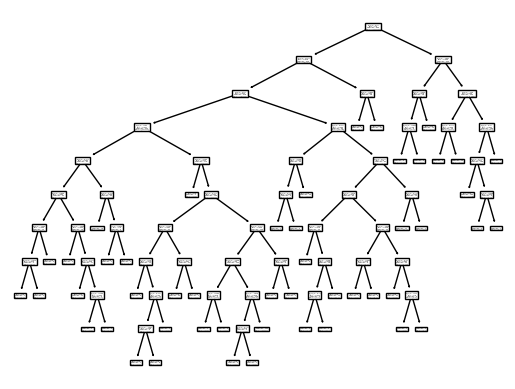

In [21]:
# plotting the model
tree.plot_tree(clf3)
plt.show()

Try building your model with different values of **max_dept** (2-10). At each step, create a plot of your tree and store the accuracies on both the training and development data.

#this function method does not work for purposes of plotting data set :(
#make fit & plot function

ta = 0
da = 0

def fitplot(y):
    ta= 'ta' + str(y)
    da= 'da' + str(y)
    md = 'md' + str(y)
    ta = 'ta' + str(y)
    
    # training a model with max depth set
    md = DecisionTreeClassifier(max_depth=(y), random_state=rseed)
    md = md.fit (X_train, y_train)
    #Finding the test data and development data scores
    ta = md.score(X_test, y_test)
    da = md.score(X_dev, y_dev)
    print('\033[1m' "Decision Tree - Max depth", y, '\033[0m' '\n' )
    print( "Test Performance:", ta)
    print("Development Performance:", da)
    print( '\n', "At depth:", md.tree_.max_depth)
    # plotting the model
    tree.plot_tree(md)
    plt.show()

for i in range(2,11):
    print (fitplot(i))


Decision Tree - Max depth 2

Test Performance: 0.8715083798882681
Development Performance: 0.8041958041958042

 At depth: 2


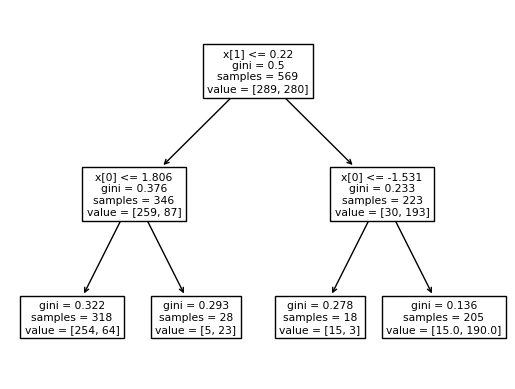

In [22]:
# training a model with max depth set
md2 = DecisionTreeClassifier(max_depth=2, random_state=rseed)
md2 = md2.fit (X_train, y_train)

#Finding the test data and development data scores
ta2 = md2.score(X_test, y_test)
da2 = md2.score(X_dev, y_dev)

print('\033[1m' "Decision Tree - Max depth 2" '\033[0m' '\n' )
print( "Test Performance:", ta2)
print("Development Performance:", da2)
print( '\n', "At depth:", md2.tree_.max_depth)

# plotting the model
tree.plot_tree(md2)
plt.show()

Decision Tree - Max depth 3

Test Performance: 0.8715083798882681
Development Performance: 0.8321678321678322

 At depth: 3


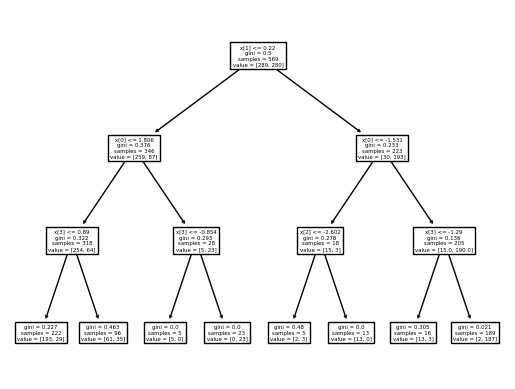

In [23]:
# training a model with max depth set
md3 = DecisionTreeClassifier(max_depth=3, random_state=rseed)
md3 = md3.fit (X_train, y_train)

#Finding the test data and development data scores
ta3 = md3.score(X_test, y_test)
da3 = md3.score(X_dev, y_dev)

print('\033[1m' "Decision Tree - Max depth 3" '\033[0m' '\n' )
print( "Test Performance:", ta3)
print("Development Performance:", da3)
print( '\n', "At depth:", md3.tree_.max_depth)

# plotting the model
tree.plot_tree(md3)
plt.show()

Decision Tree - Max depth 4

Test Performance: 0.8603351955307262
Development Performance: 0.8321678321678322

 At depth: 4


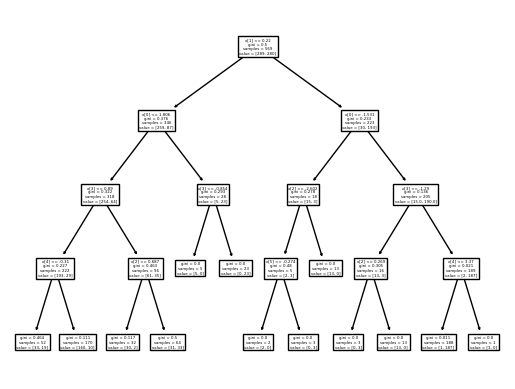

In [24]:
# training a model with max depth set
md4 = DecisionTreeClassifier(max_depth=4, random_state=rseed)
md4 = md4.fit (X_train, y_train)

#Finding the test data and development data scores
ta4 = md4.score(X_test, y_test)
da4 = md4.score(X_dev, y_dev)

print('\033[1m' "Decision Tree - Max depth 4" '\033[0m' '\n' )
print( "Test Performance:", ta4)
print("Development Performance:", da4)
print( '\n', "At depth:", md4.tree_.max_depth)

# plotting the model
tree.plot_tree(md4)
plt.show()

Decision Tree - Max depth 5

Test Performance: 0.88268156424581
Development Performance: 0.8531468531468531

 At depth: 5


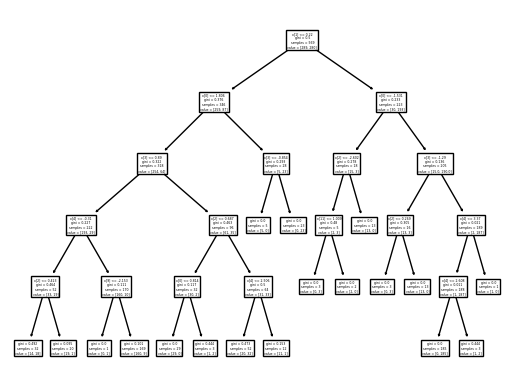

In [25]:
# training a model with max depth set
md5 = DecisionTreeClassifier(max_depth=5, random_state=rseed)
md5 = md5.fit (X_train, y_train)

#Finding the test data and development data scores
ta5 = md5.score(X_test, y_test)
da5 = md5.score(X_dev, y_dev)

print('\033[1m' "Decision Tree - Max depth 5" '\033[0m' '\n' )
print( "Test Performance:", ta5)
print("Development Performance:", da5)
print( '\n', "At depth:", md5.tree_.max_depth)

# plotting the model
tree.plot_tree(md5)
plt.show()

Decision Tree - Max depth 6

Test Performance: 0.8715083798882681
Development Performance: 0.8601398601398601

 At depth: 6


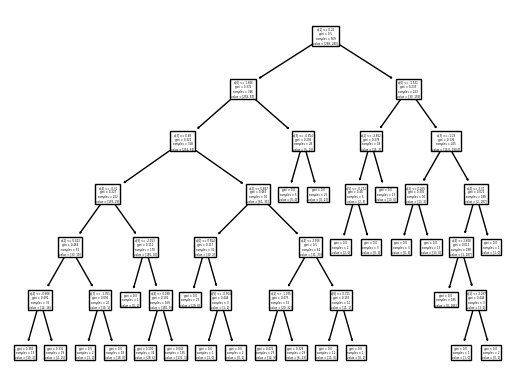

In [26]:
# training a model with max depth set
md6 = DecisionTreeClassifier(max_depth=6, random_state=rseed)
md6 = md6.fit (X_train, y_train)

#Finding the test data and development data scores
ta6 = md6.score(X_test, y_test)
da6 = md6.score(X_dev, y_dev)

print('\033[1m' "Decision Tree - Max depth 6" '\033[0m' '\n' )
print( "Test Performance:", ta6)
print("Development Performance:", da6)
print( '\n', "At depth:", md6.tree_.max_depth)

# plotting the model
tree.plot_tree(md6)
plt.show()

Decision Tree - Max depth 7

Test Performance: 0.8770949720670391
Development Performance: 0.8531468531468531

 At depth: 7


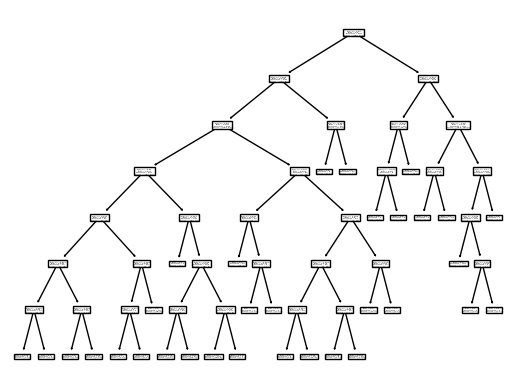

In [27]:
# training a model with max depth set
md7 = DecisionTreeClassifier(max_depth=7, random_state=rseed)
md7 = md7.fit (X_train, y_train)

#Finding the test data and development data scores
ta7 = md7.score(X_test, y_test)
da7 = md7.score(X_dev, y_dev)

print('\033[1m' "Decision Tree - Max depth 7" '\033[0m' '\n' )
print( "Test Performance:", ta7)
print("Development Performance:", da7)
print( '\n', "At depth:", md7.tree_.max_depth)

# plotting the model
tree.plot_tree(md7)
plt.show()

Decision Tree - Max depth 8

Test Performance: 0.8770949720670391
Development Performance: 0.8531468531468531

 At depth: 8


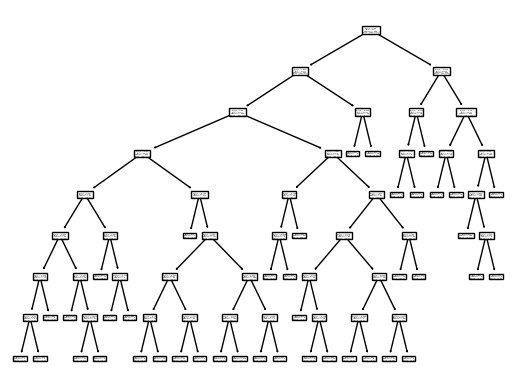

In [28]:
# training a model with max depth set
md8 = DecisionTreeClassifier(max_depth=8, random_state=rseed)
md8 = md8.fit (X_train, y_train)

#Finding the test data and development data scores
ta8 = md8.score(X_test, y_test)
da8 = md8.score(X_dev, y_dev)

print('\033[1m' "Decision Tree - Max depth 8" '\033[0m' '\n' )
print( "Test Performance:", ta8)
print("Development Performance:", da8)
print( '\n', "At depth:", md8.tree_.max_depth)

# plotting the model
tree.plot_tree(md8)
plt.show()

Decision Tree - Max depth 9

Test Performance: 0.8603351955307262
Development Performance: 0.8461538461538461

 At depth: 9


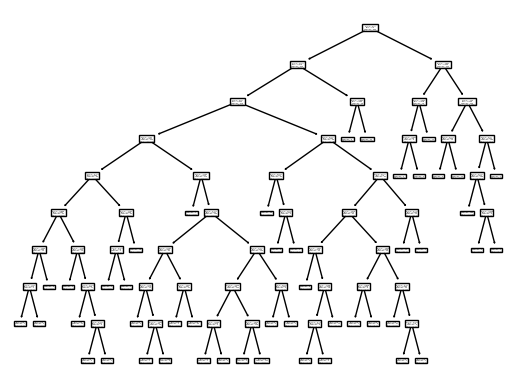

In [29]:
# training a model with max depth set
md9 = DecisionTreeClassifier(max_depth=9, random_state=rseed)
md9 = md9.fit (X_train, y_train)

#Finding the test data and development data scores
ta9 = md9.score(X_test, y_test)
da9 = md9.score(X_dev, y_dev)

print('\033[1m' "Decision Tree - Max depth 9" '\033[0m' '\n' )
print( "Test Performance:", ta9)
print("Development Performance:", da9)
print( '\n', "At depth:", md9.tree_.max_depth)

# plotting the model
tree.plot_tree(md9)
plt.show()

Decision Tree - Max depth 10

Test Performance: 0.8715083798882681
Development Performance: 0.8531468531468531

 At depth: 10


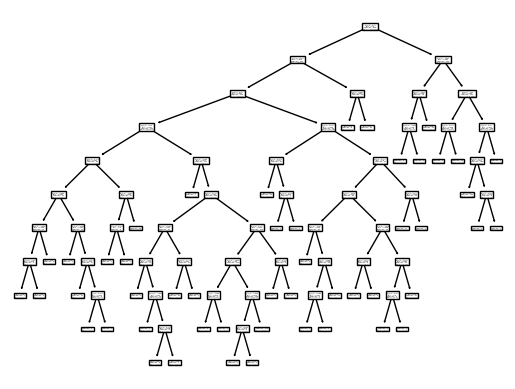

In [30]:
# training a model with max depth set
md10 = DecisionTreeClassifier(max_depth=10, random_state=rseed)
md10 = md10.fit (X_train, y_train)

#Finding the test data and development data scores
ta10 = md10.score(X_test, y_test)
da10 = md10.score(X_dev, y_dev)

print('\033[1m' "Decision Tree - Max depth 10" '\033[0m' '\n' )
print( "Test Performance:", ta10)
print("Development Performance:", da10)
print( '\n', "At depth:", md10.tree_.max_depth)

# plotting the model
tree.plot_tree(md10)
plt.show()

In [31]:
# turn scores into lists
test_score = list((ta2, ta3, ta4, ta5, ta6, ta7, ta8, ta9, ta10))
dev_score = list((da2, da3, da4, da5, da6, da7, da8, da9, da10))
depth = list((2,3,4,5,6,7,8,9,10))

#turn lists into dataframe 
score_data = list(zip(depth,test_score,dev_score))
sdf = pd.DataFrame(score_data, columns=['max_depth','test_score', 'dev_score'])

print(sdf)

   max_depth  test_score  dev_score
0          2    0.871508   0.804196
1          3    0.871508   0.832168
2          4    0.860335   0.832168
3          5    0.882682   0.853147
4          6    0.871508   0.860140
5          7    0.877095   0.853147
6          8    0.877095   0.853147
7          9    0.860335   0.846154
8         10    0.871508   0.853147


seaborn.lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, weights=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, orient='x', sort=True, err_style='band', err_kws=None, legend='auto', ci='deprecated', ax=None, **kwargs)

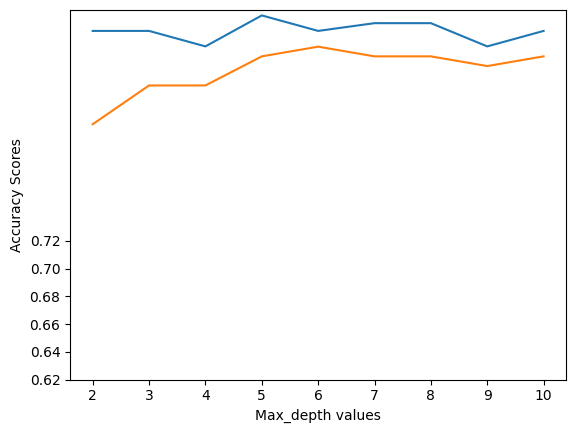

In [32]:
#plot scores

fig, ax = plt.subplots()

ax.plot(depth, test_score,)
ax.plot(depth, dev_score)

plt.ylabel("Accuracy Scores")
plt.xlabel("Max_depth values")
plt.yticks([0.62, 0.64, 0.66, 0.68, 0.70, 0.72,])

plt.show()

In [33]:
best_test_depth = depth[np.argmax(test_score)]
print('Best test set performance reached at depth of:', best_test_depth)

best_dev_depth = depth[np.argmax(dev_score)]
print('Best development set performance reached at depth of:', best_dev_depth)

Best test set performance reached at depth of: 5
Best development set performance reached at depth of: 6


Both the Test and Development data show the same rough shape and trends. 
The development setshow a consistently higher accuracy score
Both sets have the best accuracy score at depth 9. This suggests that the original tree with depth 43 was siginficantly overfitted. 

The final model has proven less accurate than the development set in the accuracy scores show up to depth 10

# Task 21

### create a *bagged, random forest,* and *boosted* tree for the titanic data set in the same way that you created a regular classification tree. 

In [34]:
#import additional packages for this task 

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [35]:
#bagged model (using 9 as this had the highest accuracy score)
base = DecisionTreeClassifier(max_depth=9)
ensemble = BaggingClassifier(estimator=base, n_estimators=100, random_state=7)
#please note example code is inaccurate and lists estimator as base_estimator

base.fit(X_train,y_train.ravel())
ensemble.fit(X_train,y_train.ravel())

print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

Accuracy base: 0.8547486033519553
Accuracy ensemble: 0.9162011173184358


In [45]:
#Random forest model
rfm = RandomForestClassifier(n_estimators=100, random_state=7)
rfm.fit(X_train, y_train.ravel())
rfm_score = rfm.score(X_test, y_test)

print("Accuracy base:", rfm_score)

Accuracy base: 0.9329608938547486


In [37]:
#boosted tree model


### From the randon forest model, determine which of the features is the one that contributes the most to predicting whether a passenger survives or not.

In [38]:
print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)
print ("Development data:",X_dev.shape, y_dev.shape)

Training data: (569, 13) (569,)
Test data: (179, 13) (179,)
Development data: (143, 13) (143,)


In [39]:
importances = rfm.feature_importances_

feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)
feature_imp_df

,Feature,Importance
1,Pclass,0.244555
0,PassengerId,0.203248
3,Age,0.138196
2,Name,0.104932
4,SibSp,0.085448
8,Sex_female,0.030141
5,Parch,0.029978
6,Ticket,0.029757
11,Embarked_Q,0.028814
9,Sex_male,0.027627


The data shows that Passenger Class has the highest importance score

### Pick one of these methods, and tune the parameters *n_estimators* and *max_depth*.

In [48]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfm,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=7), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [51]:
#Check best score hyperparameters
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
rf_best
print(rf_best)

0.8875824879346006
RandomForestClassifier(max_depth=5, min_samples_leaf=5, random_state=7)


### Report the accuracy of all models and report which model performed the best, including the values for *n_estimators* and *max_depth* that the best model had.

In [46]:
clf3_score = clf3.score(X_test, y_test)
base_score  = base.score(X_test, y_test)
ensemble_score = ensemble.score(X_test, y_test)

print('Decision Tree 3: Test, Training and Development Datasets Accuracy: {}'.format(clf3_score))
print('Base Decision Tree Accuracy: {}'.format(base_score))
print('Ensemble Decision Tree Accuracy: {}'.format(ensemble_score))
print('Random Forest Model Accuracy: {}'.format(rfm_score))

Decision Tree 3: Test, Training and Development Datasets Accuracy: 0.8547486033519553
Base Decision Tree Accuracy: 0.8547486033519553
Ensemble Decision Tree Accuracy: 0.9162011173184358
Random Forest Model Accuracy: 0.9329608938547486
